## 4. 분류모델 수립
### 4.1 목표변수 이분범주화
- 전년도보다 증가했으면 1, 아니면 0 : 회귀문제를 바이너리 분류문제로 바꿈.

In [77]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('final2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 186 entries, 기준_년_코드_x to 환승주차장
dtypes: int64(177), object(9)
memory usage: 486.9+ KB


In [79]:
# 목표변수(수치형) 이분범주화
df_target = df[['역명','월_평균_소득_금액_x','지출_총금액_x','식료품_지출_총금액_x', '의류_신발_지출_총금액_x','생활용품_지출_총금액_x','의료비_지출_총금액_x','교통_지출_총금액_x','여가_지출_총금액_x','문화_지출_총금액_x','교육_지출_총금액_x','유흥_지출_총금액_x','집객시설_수_x','총_직장_인구_수_x','남성_직장_인구_수_x','여성_직장_인구_수_x','연령대_10_직장_인구_수_x','연령대_20_직장_인구_수_x','연령대_30_직장_인구_수_x','연령대_40_직장_인구_수_x','연령대_50_직장_인구_수_x','연령대_60_이상_직장_인구_수_x','단독주택_가격_x','아파트_가격_x','연립주택_가격_x','오피스텔_가격_x','단독주택_면적_x','아파트_면적_x','연립주택_면적_x','오피스텔_면적_x','총전입_x','총전출_x','구내이동전입_x','구내이동전출_x','구간이동전입_x','구간이동전출_x','시도간이동전입_x','시도간이동전출_x','거주_세대_수_x','거주인구_총계_x','거주인구_남자_x','거주인구_여자_x','세대당인구_x','고령자_65세이상_x',
                '월_평균_소득_금액_y','지출_총금액_y','식료품_지출_총금액_y', '의류_신발_지출_총금액_y','생활용품_지출_총금액_y','의료비_지출_총금액_y','교통_지출_총금액_y','여가_지출_총금액_y','문화_지출_총금액_y','교육_지출_총금액_y','유흥_지출_총금액_y','집객시설_수_y','총_직장_인구_수_y','남성_직장_인구_수_y','여성_직장_인구_수_y','연령대_10_직장_인구_수_y','연령대_20_직장_인구_수_y','연령대_30_직장_인구_수_y','연령대_40_직장_인구_수_y','연령대_50_직장_인구_수_y','연령대_60_이상_직장_인구_수_y','단독주택_가격_y','아파트_가격_y','연립주택_가격_y','오피스텔_가격_y','단독주택_면적_y','아파트_면적_y','연립주택_면적_y','오피스텔_면적_y','총전입_y','총전출_y','구내이동전입_y','구내이동전출_y','구간이동전입_y','구간이동전출_y','시도간이동전입_y','시도간이동전출_y','거주_세대_수_y','거주인구_총계_y','거주인구_남자_y','거주인구_여자_y','세대당인구_y','고령자_65세이상_y',
                '월_평균_소득_금액','지출_총금액','식료품_지출_총금액', '의류_신발_지출_총금액','생활용품_지출_총금액','의료비_지출_총금액','교통_지출_총금액','여가_지출_총금액','문화_지출_총금액','교육_지출_총금액','유흥_지출_총금액','집객시설_수','총_직장_인구_수','남성_직장_인구_수','여성_직장_인구_수','연령대_10_직장_인구_수','연령대_20_직장_인구_수','연령대_30_직장_인구_수','연령대_40_직장_인구_수','연령대_50_직장_인구_수','연령대_60_이상_직장_인구_수','단독주택_가격','아파트_가격','연립주택_가격','오피스텔_가격','단독주택_면적','아파트_면적','연립주택_면적','오피스텔_면적','총전입','총전출','구내이동전입','구내이동전출','구간이동전입','구간이동전출','시도간이동전입','시도간이동전출','거주_세대_수','거주인구_총계','거주인구_남자','거주인구_여자','세대당인구','고령자_65세이상']]
df_target

,역명,월_평균_소득_금액_x,지출_총금액_x,식료품_지출_총금액_x,의류_신발_지출_총금액_x,생활용품_지출_총금액_x,의료비_지출_총금액_x,교통_지출_총금액_x,여가_지출_총금액_x,문화_지출_총금액_x,...,구간이동전입,구간이동전출,시도간이동전입,시도간이동전출,거주_세대_수,거주인구_총계,거주인구_남자,거주인구_여자,세대당인구,고령자_65세이상
0,4.19민주묘지역,3646983,7844647737,2047646563,944362306,575830713,1008482392,1231281077,282999865,243479898,...,1009,1238,2476,925,9489,21391,10393,10998,2,4557
1,가락시장역,4717435,8796642918,2121086628,1079893453,629718458,1073416058,1558156956,327194547,248363509,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
2,가락시장역,4717435,8796642918,2121086628,1079893453,629718458,1073416058,1558156956,327194547,248363509,...,4445,1017,12170,1265,11345,29837,14646,15191,2,3321
3,가산디지털단지역,3034082,7700911350,2020551001,942579875,591231467,994977574,1261996526,303299164,238456834,...,1908,1930,5440,2462,13767,24455,13720,10735,1,2414
4,가양역,4446808,10641450113,2623947817,1291637517,743283731,1283919445,1779087528,408173924,302355032,...,2532,1872,5831,1778,15720,42579,20772,21807,2,3963
5,가오리역,2851688,10573607348,2774983772,1277539314,777429924,1428709325,1800136585,392279116,313344530,...,1126,1287,2963,1058,11335,24339,11872,12466,2,4848
6,가좌역,3537372,6662680339,1843231031,796051264,487342279,913781167,1068128690,230936089,207016746,...,1254,1425,2706,906,8790,18768,9152,9784,2,3077
7,강남구청역,5908178,6328965502,1404836177,811345713,483768191,726548641,1153709741,305894032,174552242,...,1309,1522,3823,1157,9723,22797,11056,11740,2,2679
8,강남역,3927985,5174766784,1247633041,652881206,438888632,578426152,907910958,213096455,171223894,...,3215,3324,8536,2945,19589,37169,17691,19478,1,3498
9,강동구청역,3697071,7363481656,1788367691,919697955,543280641,900642458,1274365451,323833997,211072080,...,1304,1416,4508,3099,14325,34961,17128,17833,2,4525


In [80]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 130 entries, 역명 to 고령자_65세이상
dtypes: int64(129), object(1)
memory usage: 340.3+ KB


#### 2016 vs 2017 (1년 후)

In [81]:
df_target['월_평균_소득_금액_1년'] = np.where(df_target.월_평균_소득_금액_x < df_target.월_평균_소득_금액_y, 1, 0)

df_target['지출_총금액_1년'] = np.where(df_target.지출_총금액_x < df_target.지출_총금액_y, 1, 0)

df_target['식료품_지출_총금액_1년'] = np.where(df_target.식료품_지출_총금액_x < df_target.식료품_지출_총금액_y, 1, 0)

df_target['의류_신발_지출_총금액_1년'] = np.where(df_target.의류_신발_지출_총금액_x < df_target.의류_신발_지출_총금액_y, 1, 0)

df_target['생활용품_지출_총금액_1년'] = np.where(df_target.생활용품_지출_총금액_x < df_target.생활용품_지출_총금액_y, 1, 0)

df_target['의료비_지출_총금액_1년'] = np.where(df_target.의료비_지출_총금액_x < df_target.의료비_지출_총금액_y, 1, 0)

df_target['교통_지출_총금액_1년'] = np.where(df_target.교통_지출_총금액_x < df_target.교통_지출_총금액_y, 1, 0)

df_target['여가_지출_총금액_1년'] = np.where(df_target.여가_지출_총금액_x < df_target.여가_지출_총금액_y, 1, 0)

df_target['문화_지출_총금액_1년'] = np.where(df_target.문화_지출_총금액_x < df_target.문화_지출_총금액_y, 1, 0)

df_target['교육_지출_총금액_1년'] = np.where(df_target.교육_지출_총금액_x < df_target.교육_지출_총금액_y, 1, 0)

df_target['유흥_지출_총금액_1년'] = np.where(df_target.유흥_지출_총금액_x < df_target.유흥_지출_총금액_y, 1, 0)

df_target['총_직장_인구_수_1년'] = np.where(df_target.총_직장_인구_수_x < df_target.총_직장_인구_수_y, 1, 0)

df_target['남성_직장_인구_수_1년'] = np.where(df_target.남성_직장_인구_수_x < df_target.남성_직장_인구_수_y, 1, 0)

df_target['여성_직장_인구_수_1년'] = np.where(df_target.여성_직장_인구_수_x < df_target.여성_직장_인구_수_y, 1, 0)

df_target['연령대_10_직장_인구_수_1년'] = np.where(df_target.연령대_10_직장_인구_수_x < df_target.연령대_10_직장_인구_수_y, 1, 0)

df_target['연령대_20_직장_인구_수_1년'] = np.where(df_target.연령대_20_직장_인구_수_x < df_target.연령대_20_직장_인구_수_y, 1, 0)

df_target['연령대_30_직장_인구_수_1년'] = np.where(df_target.연령대_30_직장_인구_수_x < df_target.연령대_30_직장_인구_수_y, 1, 0)

df_target['연령대_40_직장_인구_수_1년'] = np.where(df_target.연령대_40_직장_인구_수_x < df_target.연령대_40_직장_인구_수_y, 1, 0)

df_target['연령대_50_직장_인구_수_1년'] = np.where(df_target.연령대_50_직장_인구_수_x < df_target.연령대_50_직장_인구_수_y, 1, 0)

df_target['연령대_60_이상_직장_인구_수_1년'] = np.where(df_target.연령대_60_이상_직장_인구_수_x < df_target.연령대_60_이상_직장_인구_수_y, 1, 0)

df_target['단독주택_가격_1년'] = np.where(df_target.단독주택_가격_x < df_target.단독주택_가격_y, 1, 0)

df_target['아파트_가격_1년'] = np.where(df_target.아파트_가격_x < df_target.아파트_가격_y, 1, 0)

df_target['연립주택_가격_1년'] = np.where(df_target.연립주택_가격_x < df_target.연립주택_가격_y, 1, 0)

df_target['오피스텔_가격_1년'] = np.where(df_target.오피스텔_가격_x < df_target.오피스텔_가격_y, 1, 0)

df_target['단독주택_면적_1년'] = np.where(df_target.단독주택_면적_x < df_target.단독주택_면적_y, 1, 0)

df_target['아파트_면적_1년'] = np.where(df_target.아파트_면적_x < df_target.아파트_면적_y, 1, 0)

df_target['연립주택_면적_1년'] = np.where(df_target.연립주택_면적_x < df_target.연립주택_면적_y, 1, 0)

df_target['오피스텔_면적_1년'] = np.where(df_target.오피스텔_면적_x < df_target.오피스텔_면적_y, 1, 0)

df_target['총전입_1년'] = np.where(df_target.총전입_x < df_target.총전입_y, 1, 0)

df_target['총전출_1년'] = np.where(df_target.총전출_x < df_target.총전출_y, 1, 0)

df_target['구내이동전입_1년'] = np.where(df_target.구내이동전입_x < df_target.구내이동전입_y, 1, 0)

df_target['구내이동전출_1년'] = np.where(df_target.구내이동전출_x < df_target.구내이동전출_y, 1, 0)

df_target['구간이동전입_1년'] = np.where(df_target.구간이동전입_x < df_target.구간이동전입_y, 1, 0)

df_target['구간이동전출_1년'] = np.where(df_target.구간이동전출_x < df_target.구간이동전출_y, 1, 0)

df_target['시도간이동전입_1년'] = np.where(df_target.시도간이동전입_x < df_target.시도간이동전입_y, 1, 0)

df_target['시도간이동전출_1년'] = np.where(df_target.시도간이동전출_x < df_target.시도간이동전출_y, 1, 0)

df_target['거주_세대_수_1년'] = np.where(df_target.거주_세대_수_x < df_target.거주_세대_수_y, 1, 0)

df_target['거주인구_총계_1년'] = np.where(df_target.거주인구_총계_x < df_target.거주인구_총계_y, 1, 0)

df_target['거주인구_남자_1년'] = np.where(df_target.거주인구_남자_x < df_target.거주인구_남자_y, 1, 0)

df_target['거주인구_여자_1년'] = np.where(df_target.거주인구_여자_x < df_target.거주인구_여자_y, 1, 0)

df_target['세대당인구_1년'] = np.where(df_target.세대당인구_x < df_target.세대당인구_y, 1, 0)

df_target['고령자_65세이상_1년'] = np.where(df_target.고령자_65세이상_x < df_target.고령자_65세이상_y, 1, 0)

df_target['집객시설_수_1년'] = np.where(df_target.집객시설_수_x < df_target.집객시설_수_y, 1, 0)

df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 173 entries, 역명 to 집객시설_수_1년
dtypes: int32(43), int64(129), object(1)
memory usage: 396.6+ KB


#### 2016 vs 2019 (3년 후)

In [82]:
df_target['월_평균_소득_금액_3년'] = np.where(df_target.월_평균_소득_금액_x < df_target.월_평균_소득_금액, 1, 0)

df_target['지출_총금액_3년'] = np.where(df_target.지출_총금액_x < df_target.지출_총금액, 1, 0)

df_target['식료품_지출_총금액_3년'] = np.where(df_target.식료품_지출_총금액_x < df_target.식료품_지출_총금액, 1, 0)

df_target['의류_신발_지출_총금액_3년'] = np.where(df_target.의류_신발_지출_총금액_x < df_target.의류_신발_지출_총금액, 1, 0)

df_target['생활용품_지출_총금액_3년'] = np.where(df_target.생활용품_지출_총금액_x < df_target.생활용품_지출_총금액, 1, 0)

df_target['의료비_지출_총금액_3년'] = np.where(df_target.의료비_지출_총금액_x < df_target.의료비_지출_총금액, 1, 0)

df_target['교통_지출_총금액_3년'] = np.where(df_target.교통_지출_총금액_x < df_target.교통_지출_총금액, 1, 0)

df_target['여가_지출_총금액_3년'] = np.where(df_target.여가_지출_총금액_x < df_target.여가_지출_총금액, 1, 0)

df_target['문화_지출_총금액_3년'] = np.where(df_target.문화_지출_총금액_x < df_target.문화_지출_총금액, 1, 0)

df_target['교육_지출_총금액_3년'] = np.where(df_target.교육_지출_총금액_x < df_target.교육_지출_총금액, 1, 0)

df_target['유흥_지출_총금액_3년'] = np.where(df_target.유흥_지출_총금액_x < df_target.유흥_지출_총금액, 1, 0)

df_target['총_직장_인구_수_3년'] = np.where(df_target.총_직장_인구_수_x < df_target.총_직장_인구_수, 1, 0)

df_target['남성_직장_인구_수_3년'] = np.where(df_target.남성_직장_인구_수_x < df_target.남성_직장_인구_수, 1, 0)

df_target['여성_직장_인구_수_3년'] = np.where(df_target.여성_직장_인구_수_x < df_target.여성_직장_인구_수, 1, 0)

df_target['연령대_10_직장_인구_수_3년'] = np.where(df_target.연령대_10_직장_인구_수_x < df_target.연령대_10_직장_인구_수, 1, 0)

df_target['연령대_20_직장_인구_수_3년'] = np.where(df_target.연령대_20_직장_인구_수_x < df_target.연령대_20_직장_인구_수, 1, 0)

df_target['연령대_30_직장_인구_수_3년'] = np.where(df_target.연령대_30_직장_인구_수_x < df_target.연령대_30_직장_인구_수, 1, 0)

df_target['연령대_40_직장_인구_수_3년'] = np.where(df_target.연령대_40_직장_인구_수_x < df_target.연령대_40_직장_인구_수, 1, 0)

df_target['연령대_50_직장_인구_수_3년'] = np.where(df_target.연령대_50_직장_인구_수_x < df_target.연령대_50_직장_인구_수, 1, 0)

df_target['연령대_60_이상_직장_인구_수_3년'] = np.where(df_target.연령대_60_이상_직장_인구_수_x < df_target.연령대_60_이상_직장_인구_수, 1, 0)

df_target['단독주택_가격_3년'] = np.where(df_target.단독주택_가격_x < df_target.단독주택_가격, 1, 0)

df_target['아파트_가격_3년'] = np.where(df_target.아파트_가격_x < df_target.아파트_가격, 1, 0)

df_target['연립주택_가격_3년'] = np.where(df_target.연립주택_가격_x < df_target.연립주택_가격, 1, 0)

df_target['오피스텔_가격_3년'] = np.where(df_target.오피스텔_가격_x < df_target.오피스텔_가격, 1, 0)

df_target['단독주택_면적_3년'] = np.where(df_target.단독주택_면적_x < df_target.단독주택_면적, 1, 0)

df_target['아파트_면적_3년'] = np.where(df_target.아파트_면적_x < df_target.아파트_면적, 1, 0)

df_target['연립주택_면적_3년'] = np.where(df_target.연립주택_면적_x < df_target.연립주택_면적, 1, 0)

df_target['총전입_3년'] = np.where(df_target.총전입_x < df_target.총전입, 1, 0)

df_target['총전출_3년'] = np.where(df_target.총전출_x < df_target.총전출, 1, 0)

df_target['구내이동전입_3년'] = np.where(df_target.구내이동전입_x < df_target.구내이동전입, 1, 0)

df_target['구내이동전출_3년'] = np.where(df_target.구내이동전출_x < df_target.구내이동전출, 1, 0)

df_target['구간이동전입_3년'] = np.where(df_target.구간이동전입_x < df_target.구간이동전입, 1, 0)

df_target['구간이동전출_3년'] = np.where(df_target.구간이동전출_x < df_target.구간이동전출, 1, 0)

df_target['시도간이동전입_3년'] = np.where(df_target.시도간이동전입_x < df_target.시도간이동전입, 1, 0)

df_target['시도간이동전출_3년'] = np.where(df_target.시도간이동전출_x < df_target.시도간이동전출, 1, 0)

df_target['거주_세대_수_3년'] = np.where(df_target.거주_세대_수_x < df_target.거주_세대_수, 1, 0)

df_target['거주인구_총계_3년'] = np.where(df_target.거주인구_총계_x < df_target.거주인구_총계, 1, 0)

df_target['거주인구_남자_3년'] = np.where(df_target.거주인구_남자_x < df_target.거주인구_남자, 1, 0)

df_target['거주인구_여자_3년'] = np.where(df_target.거주인구_여자_x < df_target.거주인구_여자, 1, 0)

df_target['세대당인구_3년'] = np.where(df_target.세대당인구_x < df_target.세대당인구, 1, 0)

df_target['고령자_65세이상_3년'] = np.where(df_target.고령자_65세이상_x < df_target.고령자_65세이상, 1, 0)

df_target['집객시설_수_3년'] = np.where(df_target.집객시설_수_x < df_target.집객시설_수, 1, 0)

df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Columns: 215 entries, 역명 to 집객시설_수_3년
dtypes: int32(85), int64(129), object(1)
memory usage: 451.5+ KB


In [83]:
df_target.to_csv('final_binary.csv', index=False, encoding='utf-8-sig')

### 4.2 베이스라인 모델 - 랜덤 포레스트

In [84]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [85]:
df = pd.read_csv('final_model.csv', encoding='cp949')
df

,기준_년_코드,역명,호선,장애인편의시설,만남의장소,현장사무소,민원안내,환승주차장,지하철이용객수,자전거보관가능대수,...,구간이동전입_3년,구간이동전출_3년,시도간이동전입_3년,시도간이동전출_3년,거주_세대_수_3년,거주인구_총계_3년,거주인구_남자_3년,거주인구_여자_3년,세대당인구_3년,고령자_65세이상_3년
0,2016,4.19민주묘지역,우이신설,0,0,0,0,0,0.829532,0.755984,...,0,0,0,1,1,0,0,0,0,1
1,2016,가락시장역,3,0,0,0,0,0,0.520235,0.919707,...,1,1,1,0,1,1,1,1,0,1
2,2016,가락시장역,8,1,0,0,0,0,0.475656,0.818231,...,1,1,1,0,1,1,1,1,0,1
3,2016,가산디지털단지역,7,1,0,0,0,0,0.889632,0.775517,...,1,1,1,1,1,1,1,1,0,1
4,2016,가양역,9,0,0,0,0,0,0.527622,0.784574,...,1,0,1,0,1,1,1,1,0,1
5,2016,가오리역,우이신설,0,0,0,0,0,0.829532,0.755984,...,0,0,0,0,1,0,0,0,0,1
6,2016,가좌역,경의중앙,0,0,0,0,0,0.498724,0.545269,...,0,0,0,0,0,0,0,0,0,0
7,2016,강남구청역,7,1,1,0,0,0,0.661191,0.610978,...,0,0,0,0,1,0,0,0,0,1
8,2016,강남역,2,1,0,0,1,0,1.000000,0.718128,...,1,1,0,0,1,1,1,1,0,1
9,2016,강동구청역,8,1,0,0,0,0,0.557457,0.930890,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# 입력변수 데이터프레임과 목표변수 데이터프레임 분리
df_x, df_y = df.iloc[:,3:15], df.iloc[:,18:]
df_y_all = df_y.drop(columns=['기준_년_코드.2', '상권_변화_지표_명_1년', '상권_변화_지표_명_3년'], axis=1)

# 2017년 목표변수 데이터프레임과 2019년 목표변수 데이터프레임으로 분리
df_y_17, df_y_19 = df_y_all.iloc[:, 0:44], df_y_all.iloc[:, 44:]

#### __Binary Class로 이루어진 목표변수의 0, 1 비율__

In [87]:
df_17_tmp = (df_y_17.melt().groupby(['variable','value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum'))))
df_19_tmp = (df_y_19.melt().groupby(['variable','value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum'))))
df_17_tmp
df_19_tmp

count  proportion
variable             value                   
거주_세대_수_3년           0        158    0.471642
                     1        177    0.528358
거주인구_남자_3년           0        253    0.755224
                     1         82    0.244776
거주인구_여자_3년           0        230    0.686567
                     1        105    0.313433
거주인구_총계_3년           0        245    0.731343
                     1         90    0.268657
고령자_65세이상_3년         0         98    0.292537
                     1        237    0.707463
교육_지출_총금액_3년         0        302    0.901493
                     1         33    0.098507
교통_지출_총금액_3년         0        114    0.340299
                     1        221    0.659701
구간이동전입_3년            0        255    0.761194
                     1         80    0.238806
구간이동전출_3년            0        233    0.695522
                     1        102    0.304478
구내이동전입_3년            0        285    0.850746
                     1         50    0.149254
구내이동전출_3년            0        274    0.817910
                     1         61    0.182090
남성_직장_인구_수_3년        0        125    0.373134
                     1        210    0.626866
단독주택_가격_3년           0         48    0.143284
                     1        287    0.856716
단독주택_면적_3년           0        137    0.408955
                     1        198    0.591045
문화_지출_총금액_3년         0        111    0.331343
                     1        224    0.668657
...                           ...         ...
연령대_50_직장_인구_수_3년    0        142    0.423881
                     1        193    0.576119
연령대_60_이상_직장_인구_수_3년 0        113    0.337313
                     1        222    0.662687
연립주택_가격_3년           0         70    0.208955
                     1        265    0.791045
연립주택_면적_3년           0        253    0.755224
                     1         82    0.244776
오피스텔_가격_3년           0        111    0.331343
                     1        224    0.668657
오피스텔_면적_3년           0        231    0.689552
                     1        104    0.310448
월_평균_소득_금액_3년        0        302    0.901493
                     1         33    0.098507
유흥_지출_총금액_3년         0        110    0.328358
                     1        225    0.671642
의료비_지출_총금액_3년        0        115    0.343284
                     1        220    0.656716
의류_신발_지출_총금액_3년      0        114    0.340299
                     1        221    0.659701
지출_총금액_3년            0        111    0.331343
                     1        224    0.668657
집객시설_수_3년            0         79    0.235821
                     1        256    0.764179
총_직장_인구_수_3년         0        141    0.420896
                     1        194    0.579104
총전입_3년               0        259    0.773134
                     1         76    0.226866
총전출_3년               0        275    0.820896
                     1         60    0.179104

[89 rows x 2 columns]

In [88]:
tmp = (df_y_17.melt().groupby(['variable','value']).size().to_frame(name='count').pipe(lambda x: x.assign(proportion = x[['count']]/x.groupby(level=0).transform('sum')))).reset_index()
tmp[tmp.variable=='단독주택_가격_1년']

,variable,value,count,proportion
24,단독주택_가격_1년,0,88,0.262687
25,단독주택_가격_1년,1,247,0.737313


#### Class의 비율이 불균형한 칼럼(하나의 클래스가 0.85 이상)

In [89]:
df_17_tmp[df_17_tmp.proportion >= 0.85]

,,count,proportion
variable,value,,
거주인구_남자_1년,0,294,0.877612
세대당인구_1년,0,335,1.000000
시도간이동전출_1년,0,293,0.874627
아파트_가격_1년,1,291,0.868657


In [90]:
df_19_tmp[df_19_tmp.proportion >= 0.85]

,,count,proportion
variable,value,,
교육_지출_총금액_3년,0,302,0.901493
구내이동전입_3년,0,285,0.850746
단독주택_가격_3년,1,287,0.856716
세대당인구_3년,0,335,1.000000
아파트_가격_3년,1,296,0.883582
월_평균_소득_금액_3년,0,302,0.901493


### __집값 예측 Baseline Model__
- 단독주택 가격
- 아파트 가격
- 연립주택 가격
- 오피스텔 가격

#### 단독주택 가격

2017년 단독주택 가격 AUC = 0.48623623623623624


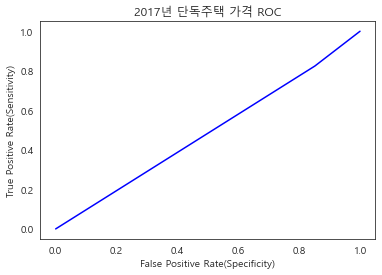

In [91]:
# 단독주택 가격(2017년)

X = df_x.values
y = df_y_17.단독주택_가격_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 단독주택 가격 AUC =", roc_auc)

# ROC
plt.title('2017년 단독주택 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 단독주택 가격 AUC = 0.5184729064039408


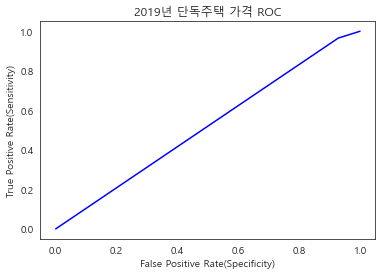

In [92]:
# 단독주택 가격(2019년)

X = df_x.values
y = df_y_19.단독주택_가격_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 단독주택 가격 AUC =", roc_auc)

# ROC
plt.title('2019년 단독주택 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 아파트 가격

2017년 아파트 가격 AUC = 0.652534965034965


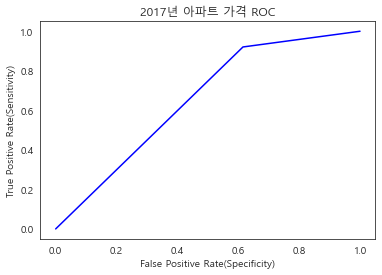

In [93]:
# 아파트 가격(2017년)

X = df_x.values
y = df_y_17.아파트_가격_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 아파트 가격 AUC =", roc_auc)

# ROC
plt.title('2017년 아파트 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 아파트 가격 AUC = 0.6802434456928839


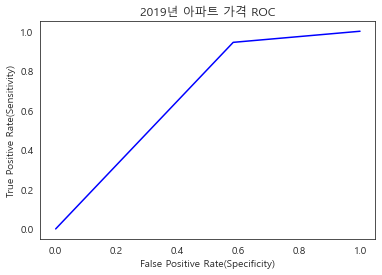

In [94]:
# 아파트 가격(2019년)

X = df_x.values
y = df_y_19.아파트_가격_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 아파트 가격 AUC =", roc_auc)

# ROC
plt.title('2019년 아파트 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 연립주택 가격

2017년 연립주택 가격 AUC = 0.5913419913419914


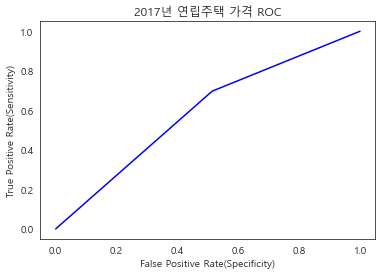

In [95]:
# 연립주택 가격(2017년)

X = df_x.values
y = df_y_17.연립주택_가격_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 연립주택 가격 AUC =", roc_auc)

# ROC
plt.title('2017년 연립주택 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 연립주택 가격 AUC = 0.5026785714285715


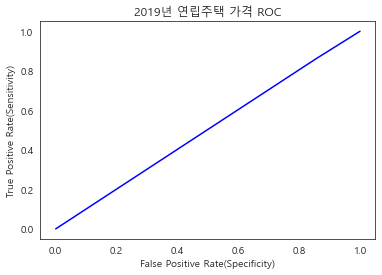

In [96]:
# 연립주택 가격(2019년)

X = df_x.values
y = df_y_19.연립주택_가격_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 연립주택 가격 AUC =", roc_auc)

# ROC
plt.title('2019년 연립주택 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 오피스텔 가격

2017년 오피스텔 가격 AUC = 0.521186440677966


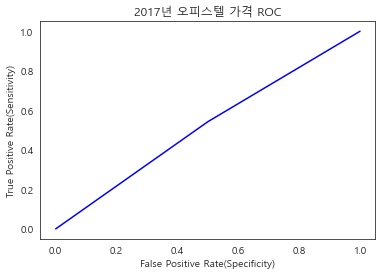

In [97]:
# 오피스텔 가격(2017년)

X = df_x.values
y = df_y_17.오피스텔_가격_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 오피스텔 가격 AUC =", roc_auc)

# ROC
plt.title('2017년 오피스텔 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 오피스텔 가격 AUC = 0.5057932263814617


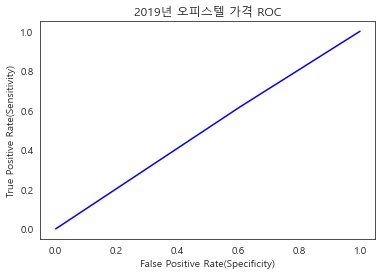

In [98]:
# 오피스텔 가격(2019년)

X = df_x.values
y = df_y_19.오피스텔_가격_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 오피스텔 가격 AUC =", roc_auc)

# ROC
plt.title('2019년 오피스텔 가격 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

### __인구 변화 예측 Baseline Model__
- 직장인구: 총직장인구수, 성별(여성, 남성)직장인구수, 연령대별(10대~60대이상)직장인구수
- 전입전출인구: 총전입/전출인구수, 구내이동전입/전출인구수, 구간이동전입/전출인구수, 시도간이동전입/전출인구수
- 거주인구: 거주세대수, 총거주인구수, 성별(여성, 남성)거주인구수, 세대당인구수, 고령자(65세이상)인구수

#### 직장인구

2017년 총 직장 인구 수 AUC = 0.5459183673469388


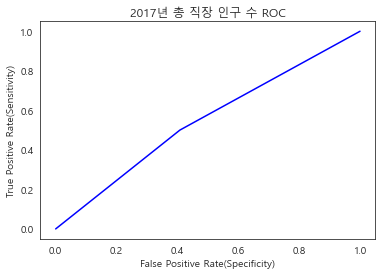

In [99]:
# 총 직장 인구 수(2017년)

X = df_x.values
y = df_y_17.총_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 총 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 총 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 총 직장 인구 수 AUC = 0.551924619085806


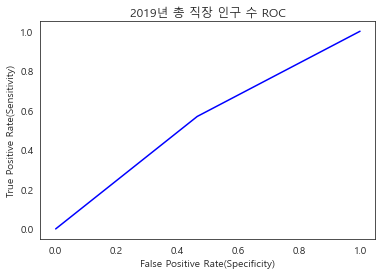

In [100]:
# 총 직장 인구 수(2019년)

X = df_x.values
y = df_y_19.총_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 총 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 총 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 여성 직장 인구 수 AUC = 0.5862884160756502


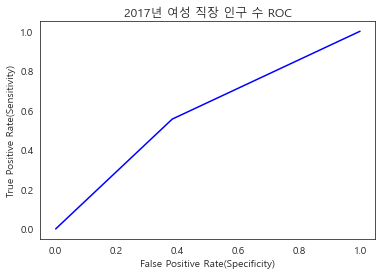

In [101]:
# 여성 직장 인구 수(2017년)

X = df_x.values
y = df_y_17.여성_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 여성 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 여성 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 여성 직장 인구 수 AUC = 0.49444444444444446


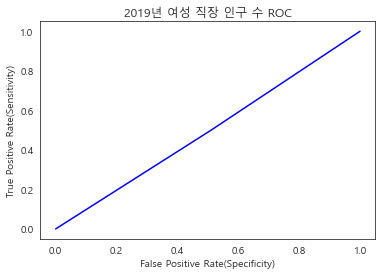

In [102]:
# 여성 직장 인구 수(2019년)

X = df_x.values
y = df_y_19.여성_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 여성 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 여성 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 남성 직장 인구 수 AUC = 0.5938256658595642


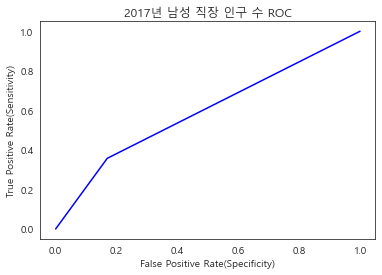

In [103]:
# 남성 직장 인구 수(2017년)

X = df_x.values
y = df_y_17.남성_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 남성 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 남성 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 남성 직장 인구 수 AUC = 0.5753968253968254


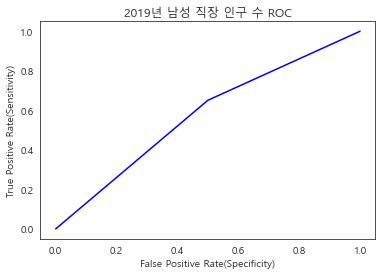

In [104]:
# 남성 직장 인구 수(2019년)

X = df_x.values
y = df_y_19.남성_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 남성 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 남성 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 10대 직장 인구 수 AUC = 0.5675146771037183


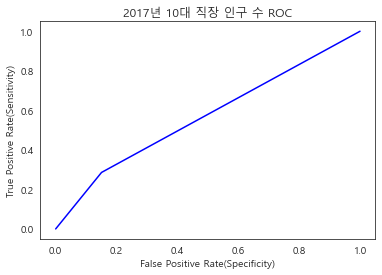

In [105]:
# 10대 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_10_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 10대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 10대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 10대 직장 인구 수 AUC = 0.5251782531194297


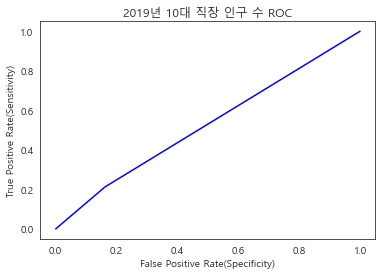

In [106]:
# 10대 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_10_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 10대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 10대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 20대 직장 인구 수 AUC = 0.47798742138364775


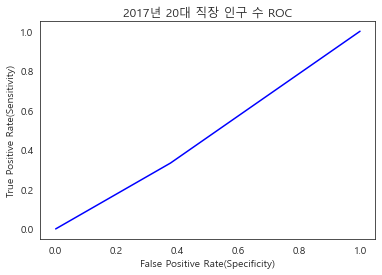

In [107]:
# 20대 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_20_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 20대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 20대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 20대 직장 인구 수 AUC = 0.4296747967479675


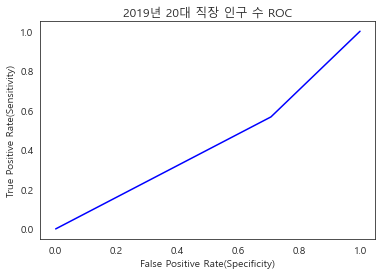

In [108]:
# 20대 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_20_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 20대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 20대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 30대 직장 인구 수 AUC = 0.5876358695652174


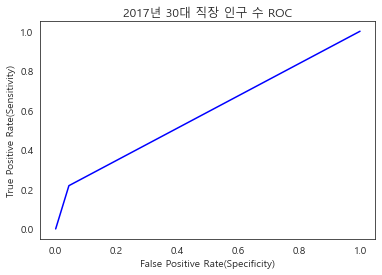

In [109]:
# 30대 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_30_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 30대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 30대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 30대 직장 인구 수 AUC = 0.550197628458498


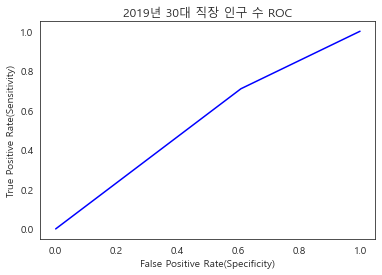

In [110]:
# 30대 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_30_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 30대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 30대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 40대 직장 인구 수 AUC = 0.5734463276836158


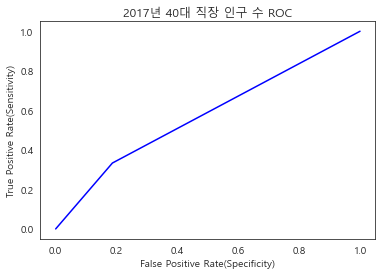

In [111]:
# 40대 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_40_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 40대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 40대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 40대 직장 인구 수 AUC = 0.5007905138339921


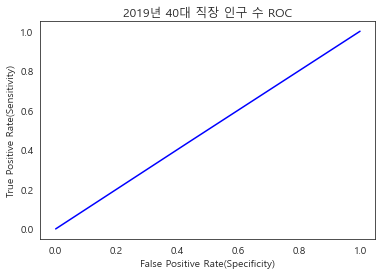

In [112]:
# 40대 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_40_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 40대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 40대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 50대 직장 인구 수 AUC = 0.61699604743083


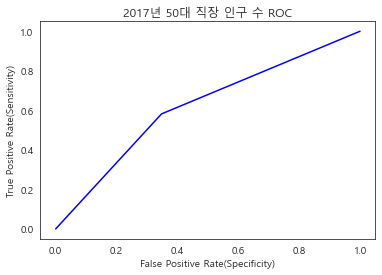

In [113]:
# 50대 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_50_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 50대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 50대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 50대 직장 인구 수 AUC = 0.6006415396952687


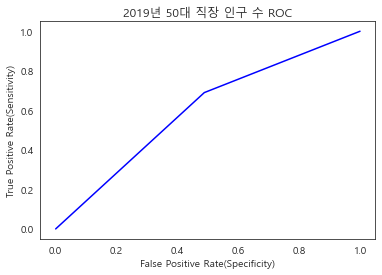

In [114]:
# 50대 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_50_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 50대 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 50대 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 60대 이상 직장 인구 수 AUC = 0.5405982905982906


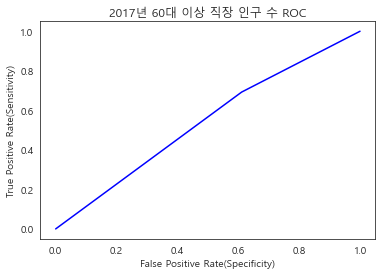

In [115]:
# 60 이상 직장 인구 수(2017년)

X, y = df_x.values, df_y_17.연령대_60_이상_직장_인구_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 60대 이상 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 60대 이상 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 60대 이상 직장 인구 수 AUC = 0.5498244073748902


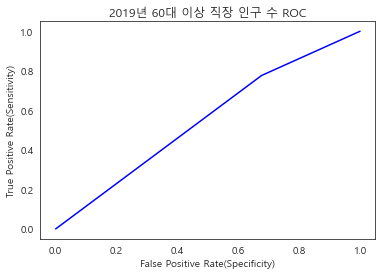

In [116]:
# 60 이상 직장 인구 수(2019년)

X, y = df_x.values, df_y_19.연령대_60_이상_직장_인구_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 60대 이상 직장 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 60대 이상 직장 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 전입/전출 인구

2017년 총 전입 인구 수 AUC = 0.47468354430379744


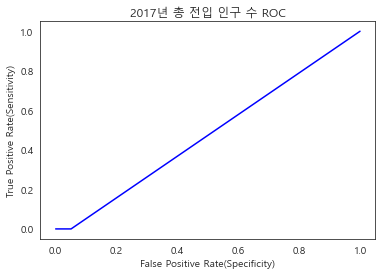

In [117]:
# 총 전입 인구 수(2017년)

X, y = df_x.values, df_y_17.총전입_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 총 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 총 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 총 전입 인구 수 AUC = 0.5050167224080268


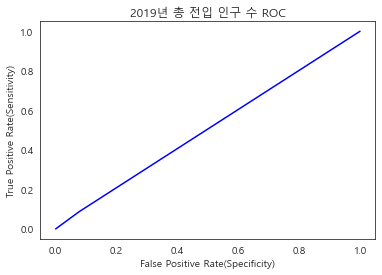

In [118]:
# 총 전입 인구 수(2019년)

X, y = df_x.values, df_y_19.총전입_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 총 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 총 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label= roc_auc);

2017년 총 전출 인구 수 AUC = 0.4939759036144578


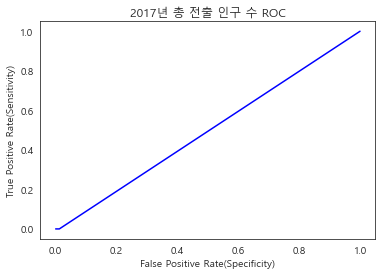

In [119]:
# 총 전출 인구 수(2017년)

X, y = df_x.values, df_y_17.총전출_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 총 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 총 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 총 전출 인구 수 AUC = 0.4819277108433735


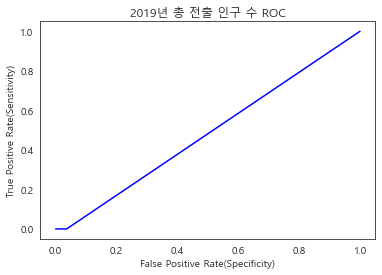

In [120]:
# 총 전출 인구 수(2019년)

X, y = df_x.values, df_y_19.총전출_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 총 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 총 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 구내이동 전입 인구 수 AUC = 0.5317901234567902


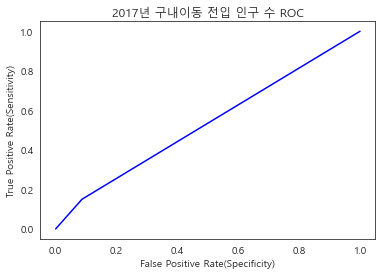

In [121]:
# 구내이동 전입 인구 수(2017년)

X, y = df_x.values, df_y_17.구내이동전입_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 구내이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 구내이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 구내이동 전입 인구 수 AUC = 0.48255813953488375


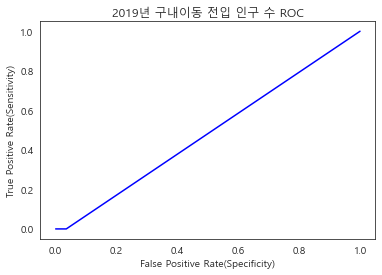

In [122]:
# 구내이동 전입 인구 수(2019년)

X, y = df_x.values, df_y_19.구내이동전입_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 구내이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 구내이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 구내이동 전출 인구 수 AUC = 0.573051948051948


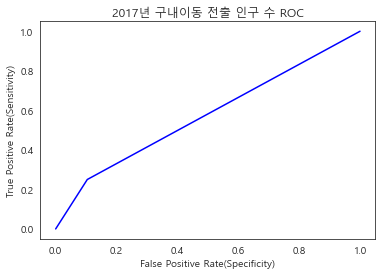

In [123]:
# 구내이동 전출 인구 수(2017년)

X, y = df_x.values, df_y_17.구내이동전출_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 구내이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 구내이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 구내이동 전출 인구 수 AUC = 0.5314591700133869


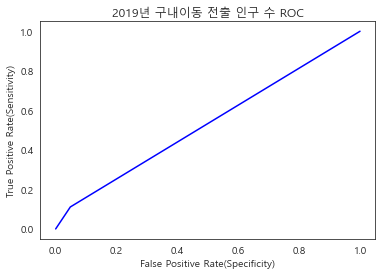

In [124]:
# 구내이동 전출 인구 수(2019년)

X, y = df_x.values, df_y_19.구내이동전출_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 구내이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 구내이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 구간이동 전입 인구 수 AUC = 0.5827380952380952


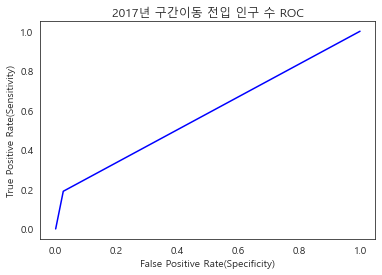

In [125]:
# 구간이동 전입 인구 수(2017년)

X, y = df_x.values, df_y_17.구간이동전입_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 구간이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 구간이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 구간이동 전입 인구 수 AUC = 0.44291125541125537


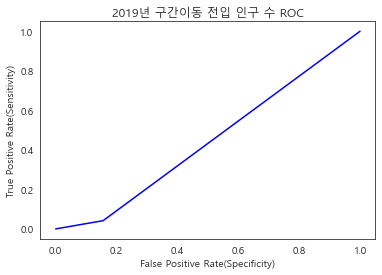

In [126]:
# 구간이동 전입 인구 수(2019년)

X, y = df_x.values, df_y_19.구간이동전입_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 구간이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 구간이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 구간이동 전출 인구 수 AUC = 0.5129499561018437


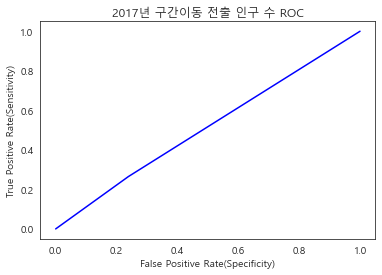

In [127]:
# 구간이동 전출 인구 수(2017년)

X, y = df_x.values, df_y_17.구간이동전출_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 구간이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 구간이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 구간이동 전출 인구 수 AUC = 0.5414746543778802


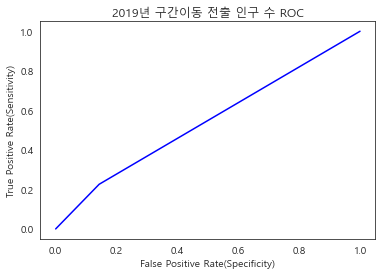

In [128]:
# 구간이동 전출 인구 수(2019년)

X, y = df_x.values, df_y_19.구간이동전출_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 구간이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 구간이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 시도간이동 전입 인구 수 AUC = 0.5592635212888377


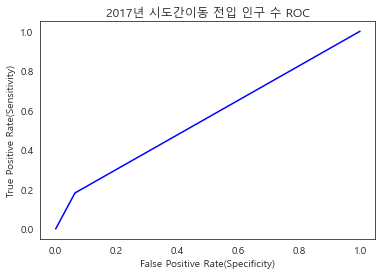

In [129]:
# 시도간이동 전입 인구 수(2017년)

X, y = df_x.values, df_y_17.시도간이동전입_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 시도간이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 시도간이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 시도간이동 전입 인구 수 AUC = 0.48968784838350055


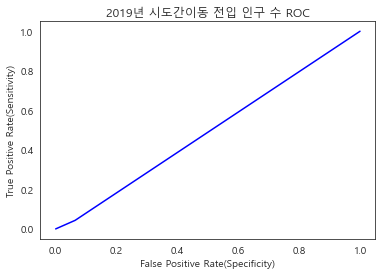

In [130]:
# 시도간이동 전입 인구 수(2019년)

X, y = df_x.values, df_y_19.시도간이동전입_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 시도간이동 전입 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 시도간이동 전입 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 시도간이동 전출 인구 수 AUC = 0.5270979020979021


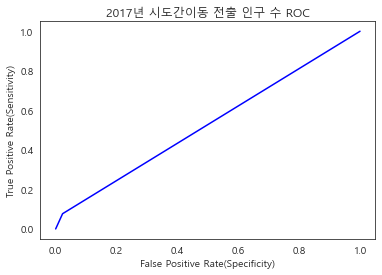

In [131]:
# 시도간이동 전출 인구 수(2017년)

X, y = df_x.values, df_y_17.시도간이동전출_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 시도간이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 시도간이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 시도간이동 전출 인구 수 AUC = 0.4588235294117647


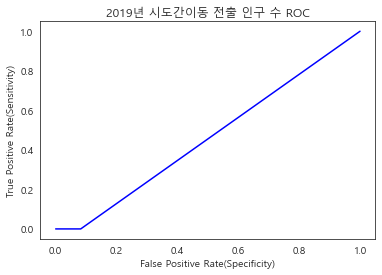

In [132]:
# 시도간이동 전출 인구 수(2019년)

X, y = df_x.values, df_y_19.시도간이동전출_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 시도간이동 전출 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 시도간이동 전출 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 거주인구

2017년 총 거주 인구 수 AUC = 0.5115546218487395


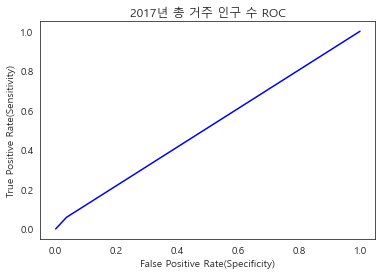

In [133]:
# 총 거주 인구 수(2017년)

X, y = df_x.values, df_y_17.거주인구_총계_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 총 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 총 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 총 거주 인구 수 AUC = 0.5082582582582583


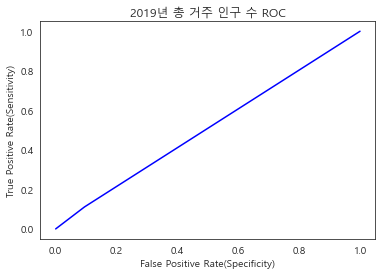

In [134]:
# 총 거주 인구 수(2019년)

X, y = df_x.values, df_y_19.거주인구_총계_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 총 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 총 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 고령자 거주 인구 수 AUC = 0.5935483870967742


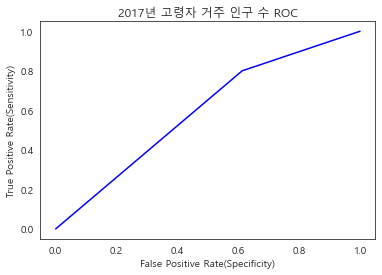

In [135]:
# 고령자(65세 이상) 인구 수(2017년)

X, y = df_x.values, df_y_17.고령자_65세이상_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 고령자 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 고령자 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 고령자 거주 인구 수 AUC = 0.5847417840375587


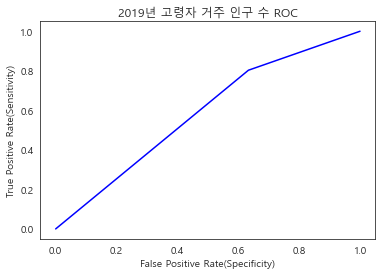

In [136]:
# 고령자(65세 이상) 인구 수(2019년)

X, y = df_x.values, df_y_19.고령자_65세이상_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 고령자 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 고령자 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 여성 거주 인구 수 AUC = 0.5191358024691358


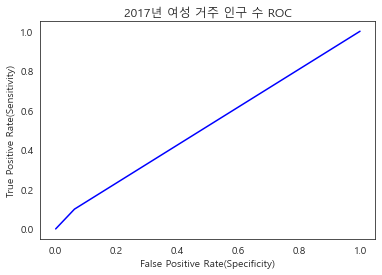

In [137]:
# 여성 거주 인구 수(2017년)

X, y = df_x.values, df_y_17.거주인구_여자_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 여성 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 여성 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 여성 거주 인구 수 AUC = 0.5235507246376812


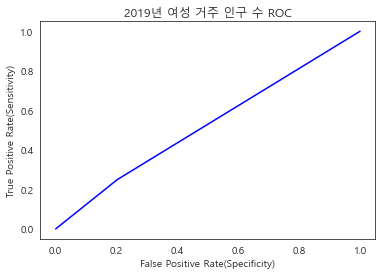

In [138]:
# 여성 거주 인구 수(2019년)

X, y = df_x.values, df_y_19.거주인구_여자_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 여성 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 여성 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 남성 거주 인구 수 AUC = 0.4943820224719101


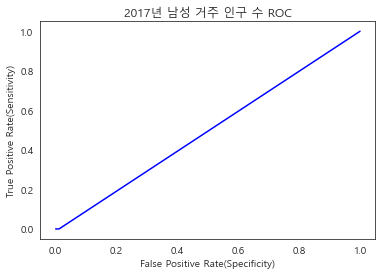

In [139]:
# 남성 거주 인구 수(2017년)

X, y = df_x.values, df_y_17.거주인구_남자_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 남성 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2017년 남성 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 남성 거주 인구 수 AUC = 0.5473684210526316


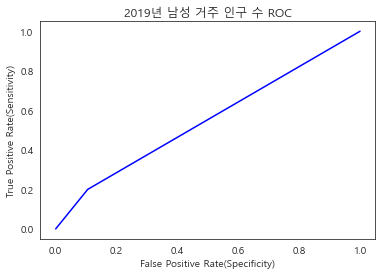

In [140]:
# 남성 거주 인구 수(2019년)

X, y = df_x.values, df_y_19.거주인구_남자_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 남성 거주 인구 수 AUC =", roc_auc)

# ROC
plt.title('2019년 남성 거주 인구 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

### __상권 변화 예측 Baseline Model__
- 상권변화지표
- 상권 별 소득, 지출: 월평균소득, 총지출액, 식료품지출, 의류신발지출, 생활용품지출, 의료비지출, 교통지출, 여가지출, 문화지출, 교육지출, 유흥지출
- 집객시설 수

#### 상권변화지표

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        33
           1       0.50      0.27      0.35        15
           2       0.32      0.35      0.33        20
           3       0.46      0.48      0.47        33

   micro avg       0.47      0.47      0.47       101
   macro avg       0.46      0.43      0.43       101
weighted avg       0.47      0.47      0.46       101



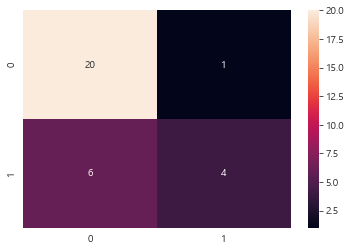

In [141]:
# 상권변화지표(2017년)

X, y = df_x.values, df_y_17.상권_변화_지표_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))
cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(cm)
sns.heatmap(confusion,annot=True,fmt='g');

              precision    recall  f1-score   support

           0       0.49      0.55      0.51        33
           1       0.00      0.00      0.00        12
           2       0.00      0.00      0.00        15
           3       0.50      0.61      0.55        41

   micro avg       0.43      0.43      0.43       101
   macro avg       0.25      0.29      0.27       101
weighted avg       0.36      0.43      0.39       101



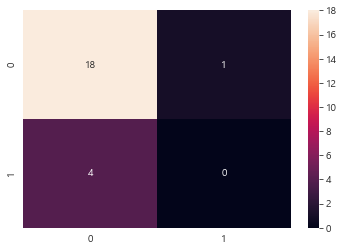

In [142]:
# 상권변화지표(2019년)

X, y = df_x.values, df_y_19.상권_변화_지표_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation
print(classification_report(y_test, y_pred))
cm = np.array(confusion_matrix(y_test, y_pred, labels=[0,1]))
confusion = pd.DataFrame(cm)
sns.heatmap(confusion,annot=True,fmt='g');

#### 업종 별 소득/지출

2017년 월 평균 소득 금액 AUC = 0.5489837398373983


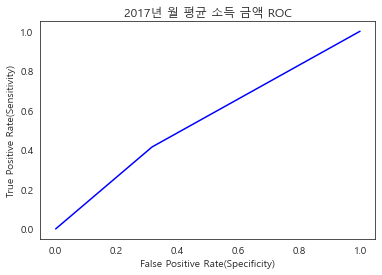

In [143]:
# 월 평균 소득 금액(2017년)

X, y = df_x.values, df_y_17.월_평균_소득_금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 월 평균 소득 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 월 평균 소득 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 지출 총 금액 AUC = 0.5295698924731183


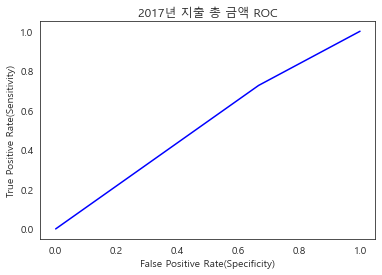

In [144]:
# 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 지출 총 금액 AUC = 0.5572638146167558


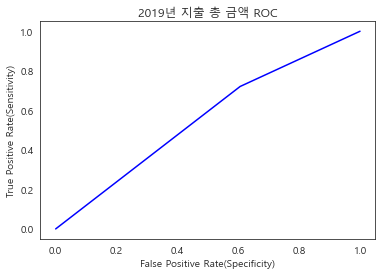

In [145]:
# 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 의류, 신발 지출 총 금액 AUC = 0.5804383788254756


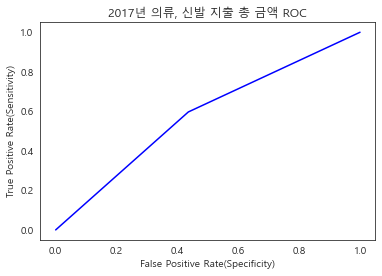

In [146]:
# 의류, 신발 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.의류_신발_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 의류, 신발 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 의류, 신발 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 의류, 신발 지출 총 금액 AUC = 0.5638718173836699


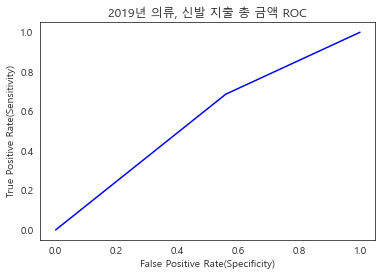

In [147]:
# 의류, 신발 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.의류_신발_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 의류, 신발 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 의류, 신발 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 의료비 지출 총 금액 AUC = 0.6549636803874092


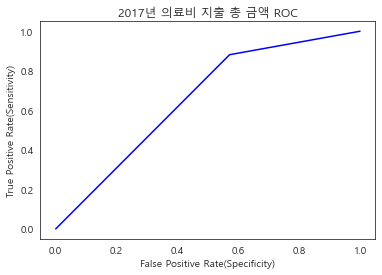

In [148]:
# 의료비 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.의료비_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 의료비 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 의료비 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 의료비 지출 총 금액 AUC = 0.5761904761904761


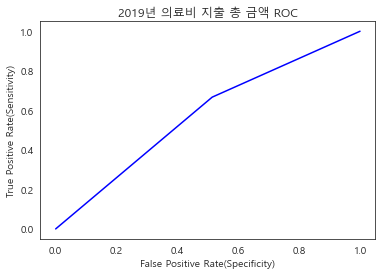

In [149]:
# 의료비 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.의료비_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 의료비 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 의료비 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 생활용품 지출 총 금액 AUC = 0.5694789081885856


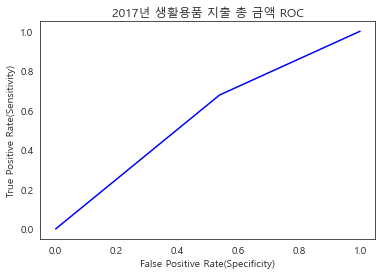

In [150]:
# 생활용품 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.생활용품_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 생활용품 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 생활용품 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

In [163]:
# 생활용품 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.생활용품_지출_총금액3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 생활용품 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 생활용품 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

AttributeError: 'DataFrame' object has no attribute '생활용품_지출_총금액3년'

2017년 여가 지출 총 금액 AUC = 0.48593879239040527


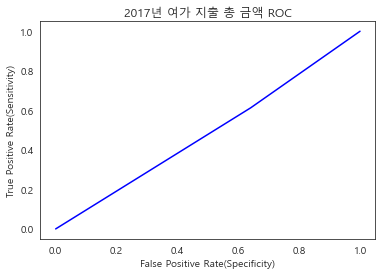

In [152]:
# 여가 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.여가_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 여가 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 여가 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 여가 지출 총 금액 AUC = 0.6188524590163935


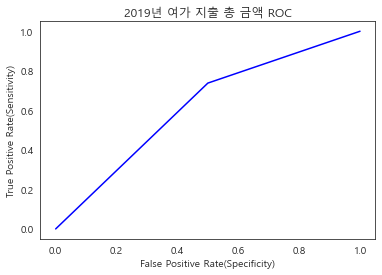

In [153]:
# 여가 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.여가_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 여가 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 여가 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 문화 지출 총 금액 AUC = 0.576095947063689


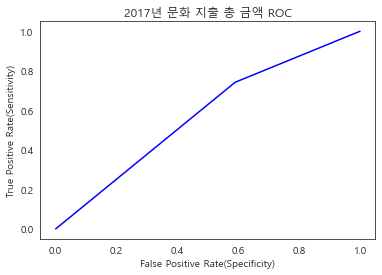

In [154]:
# 문화 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.문화_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 문화 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 문화 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 문화 지출 총 금액 AUC = 0.5568181818181819


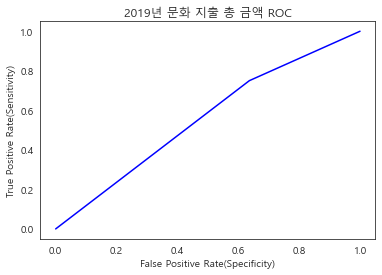

In [155]:
# 문화 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.문화_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 문화 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 문화 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 교육 지출 총 금액 AUC = 0.5495934959349594


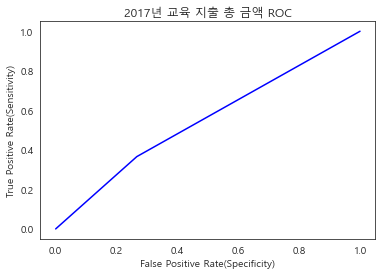

In [156]:
# 교육 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.교육_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 교육 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 교육 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 교육 지출 총 금액 AUC = 0.4945054945054945


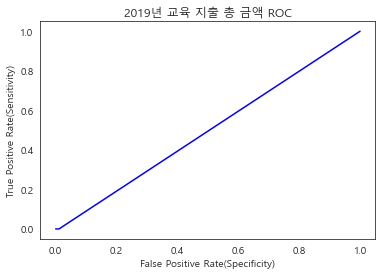

In [157]:
# 교육 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.교육_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 교육 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 교육 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2017년 유흥 지출 총 금액 AUC = 0.49065040650406505


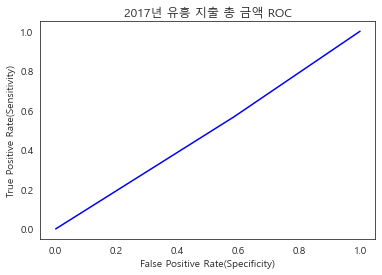

In [158]:
# 유흥 지출 총 금액(2017년)

X, y = df_x.values, df_y_17.유흥_지출_총금액_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 유흥 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2017년 유흥 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 유흥 지출 총 금액 AUC = 0.5559269162210339


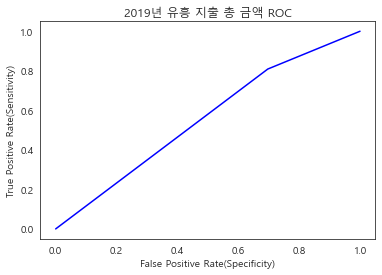

In [159]:
# 유흥 지출 총 금액(2019년)

X, y = df_x.values, df_y_19.유흥_지출_총금액_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 유흥 지출 총 금액 AUC =", roc_auc)

# ROC
plt.title('2019년 유흥 지출 총 금액 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

#### 집객시설 수

2017년 집객시설 수 AUC = 0.5575380914194066


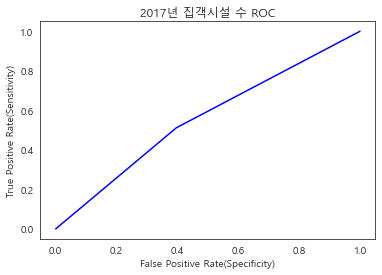

In [160]:
# 집객시설 수(2017년)

X, y = df_x.values, df_y_17.집객시설_수_1년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2017년 집객시설 수 AUC =", roc_auc)

# ROC
plt.title('2017년 집객시설 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);

2019년 집객시설 수 AUC = 0.5300324675324675


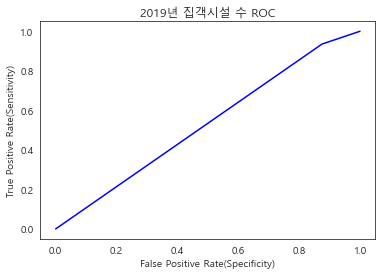

In [161]:
# 집객시설 수(2019년)

X, y = df_x.values, df_y_19.집객시설_수_3년.values

# Train, Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Model Fitting
RF_clf = RandomForestClassifier()
RF_clf.fit(X_train, y_train)
y_pred = RF_clf.predict(X_test)

# Model Evaluation (AUC)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print("2019년 집객시설 수 AUC =", roc_auc)

# ROC
plt.title('2019년 집객시설 수 ROC')
plt.xlabel('False Positive Rate(Specificity)')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.plot(fpr, tpr, 'b', label=roc_auc);